In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sps

In [12]:
data50 = pd.read_csv("50x50.txt", sep = "\t", names  = ['Field', 'intensity'],skiprows=[0])
data250 = pd.read_csv("1_250mA_x20.epr.txt", sep = "\t", names  = ['Field', 'intensity'],skiprows=[0])
data500 = pd.read_csv("1_500mA_x20.epr.txt", sep = "\t", names  = ['Field', 'intensity'],skiprows=[0])
data750 = pd.read_csv("1_750mA_x20.epr.txt", sep = "\t", names  = ['Field', 'intensity'],skiprows=[0])
data1000 = pd.read_csv("1_1000mA_x20.epr.txt", sep = "\t", names  = ['Field', 'intensity'],skiprows=[0])
data1250 = pd.read_csv("1_1250mA_x20.epr.txt", sep = "\t", names  = ['Field', 'intensity'],skiprows=[0])
data1500 = pd.read_csv("1_1500mA_x20.epr.txt", sep = "\t", names  = ['Field', 'intensity'],skiprows=[0])

In [18]:
x1 = data50['Field']
y1 = data50['intensity']
x2 = data250['Field']
y2 = data250['intensity']
x3 = data500['Field']
y3 = data500['intensity']
x4 = data750['Field']
y4 = data750['intensity']
x5 = data1000['Field']
y5 = data1000['intensity']
x6 = data1250['Field']
y6 = data1250['intensity']
x7 = data1500['Field']
y7 = data1500['intensity']

Text(0.5, 1.0, 'Спектры ЭПР при разном токе в катушках')

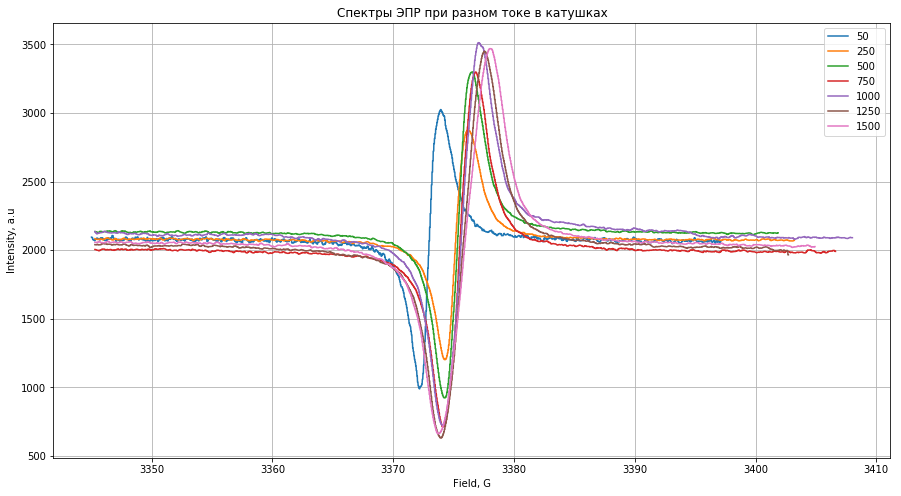

In [22]:
plt.figure(figsize=(15, 8)) # можно указать явно ширину и высоту графика (строчка не обязательна)\n",
plt.plot(x1,y1, label='50')
#plt.plot(x1_fit,y1_fit, linewidth=1, color='green', label='Water poly')
plt.plot(x2,y2,label='250')
#plt.plot(x2_fit,y2_fit, linewidth=1, color='red', label='metanol poly')
plt.plot(x3,y3, label='500')
#plt.plot(x3_fit,y3_fit, linewidth=1, color='blue', label='etanol poly')
plt.plot(x4,y4,  label='750')
#plt.plot(x4_fit,y4_fit, linewidth=1, color='black', label='isopropanol poly')
plt.plot(x5,y5,  label='1000')
plt.plot(x6,y6, label='1250')
plt.plot(x7,y7, label='1500')
plt.legend() # показывать легенду,
plt.grid() # включить отрисовку сетки c определенными параметрами\n",
plt.yticks() # можно явно указать, как подписывать ось\n",
plt.xticks()
plt.xlabel('Field, G')
plt.ylabel('Intensity, a.u')
plt.title('Спектры ЭПР при разном токе в катушках')

In [43]:
def halfwidth(x, y):
    maks = max(y)
    default = np.mean(y[0:15])
    halfheight = (maks - default)/1.4
    halfheight = halfheight+default
    for i in range(len(y)):
        if(y[i] == maks):
            xmax = x[i]
            indmax = i
    dist = maks
    for i in range(indmax):
        if(abs(halfheight - y[i]) < dist):
            x1 = x[i]
            dist = abs(halfheight - y[i])
    dist = maks
    for i in range(indmax, len(x)):
        if(abs(halfheight - y[i]) < dist):
            x2 = x[i]
            dist = abs(halfheight - y[i])
    return((x2 - x1)/2)

In [48]:
polush = []
I = [50, 250, 500, 750, 1000, 1250, 1500]
polush.append(halfwidth(x1, y1))
polush.append(halfwidth(x2, y2))
polush.append(halfwidth(x3, y3))
polush.append(halfwidth(x4, y4))
polush.append(halfwidth(x5, y5))
polush.append(halfwidth(x6, y6))
polush.append(halfwidth(x7, y7))

In [60]:
lin = np.polyfit(I, polush, 1)
p = np.poly1d(lin)
x0 = np.linspace(0, 1500, 1400)
lin

array([2.05174617e-04, 6.12510647e-01])

Text(0.5, 1.0, 'Зависимость полуширины пиков от тока')

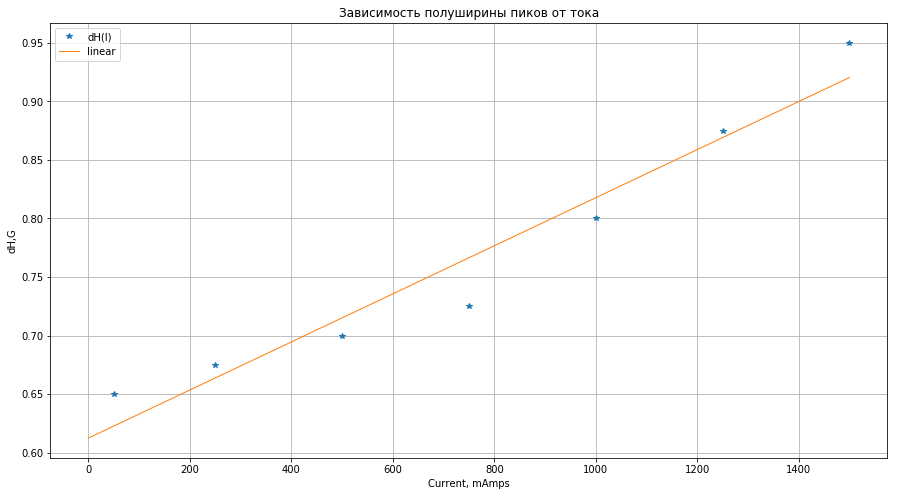

In [59]:
plt.figure(figsize=(15, 8)) # можно указать явно ширину и высоту графика (строчка не обязательна)\n",
plt.plot(I,polush, label='dH(I)', linewidth=0, marker = "*")
plt.plot(x0,p(x0), label='linear', linewidth=1)
plt.legend() # показывать легенду,
plt.grid() # включить отрисовку сетки c определенными параметрами\n",
plt.yticks() # можно явно указать, как подписывать ось\n",
plt.xticks()
plt.xlabel('Current, mAmps')
plt.ylabel('dH,G')
plt.title('Зависимость полуширины пиков от тока')

In [4]:
mn05 = pd.read_csv("2-1_0.05M_1000mA_x10.epr.txt", sep = "\t", names  = ['Field', 'intensity'],skiprows=[0])
mn1 = pd.read_csv("2-1_0.1M_1000mA_x10.epr.txt", sep = "\t", names  = ['Field', 'intensity'],skiprows=[0])
mn2 = pd.read_csv("2-1_0.2M_1000mA_x10.epr.txt", sep = "\t", names  = ['Field', 'intensity'],skiprows=[0])
mn4 = pd.read_csv("2-1_0.4M_1000mA_x20.epr.txt", sep = "\t", names  = ['Field', 'intensity'],skiprows=[0])
mn5 = pd.read_csv("2-1_0.5M_1000mA_x10.epr.txt", sep = "\t", names  = ['Field', 'intensity'],skiprows=[0])
mn8 = pd.read_csv("2-1_0.8M_1000mA_x20.epr.txt", sep = "\t", names  = ['Field', 'intensity'],skiprows=[0])

In [6]:
x01 = mn05['Field']
y01 = mn05['intensity']
x02 = mn1['Field']
y02 = mn1['intensity']
x03 = mn2['Field']
y03 = mn2['intensity']
x04 = mn4['Field']
y04 = mn4['intensity']
x05 = mn5['Field']
y05 = mn5['intensity']
x06 = mn8['Field']
y06 = mn8['intensity']

c:\users\павел\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\павел\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\павел\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5, 1.0, 'Спектры ЭПР при разной концентрации марганца')

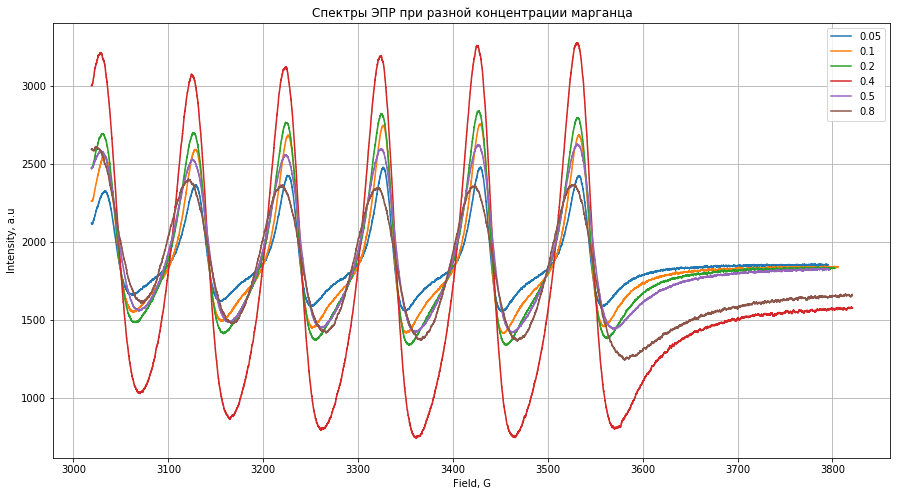

In [7]:
plt.figure(figsize=(15, 8)) # можно указать явно ширину и высоту графика (строчка не обязательна)\n",
plt.plot(x01,y01, label='0.05')
plt.plot(x02,y02,label='0.1')
plt.plot(x03,y03, label='0.2')
plt.plot(x04,y04,  label='0.4')
plt.plot(x05,y05,  label='0.5')
plt.plot(x06,y06, label='0.8')
plt.legend() # показывать легенду,
plt.grid() # включить отрисовку сетки c определенными параметрами\n",
plt.yticks() # можно явно указать, как подписывать ось\n",
plt.xticks()
plt.xlabel('Field, G')
plt.ylabel('Intensity, a.u')
plt.title('Спектры ЭПР при разной концентрации марганца')

In [9]:
def obrez(x, y):
    newx, newy = [], []
    for i in range(len(x)):
        if x[i] > 3450:
            newx.append(x[i])
            newy.append(y[i])
    return(newx, newy)

In [11]:
x001, y001 = obrez(x01, y01)
x002, y002 = obrez(x02, y02)
x003, y003 = obrez(x03, y03)
x004, y004 = obrez(x04, y04)
x005, y005 = obrez(x05, y05)
x006, y006 = obrez(x06, y06)

Text(0.5, 1.0, 'Спектры ЭПР при разной концентрации марганца')

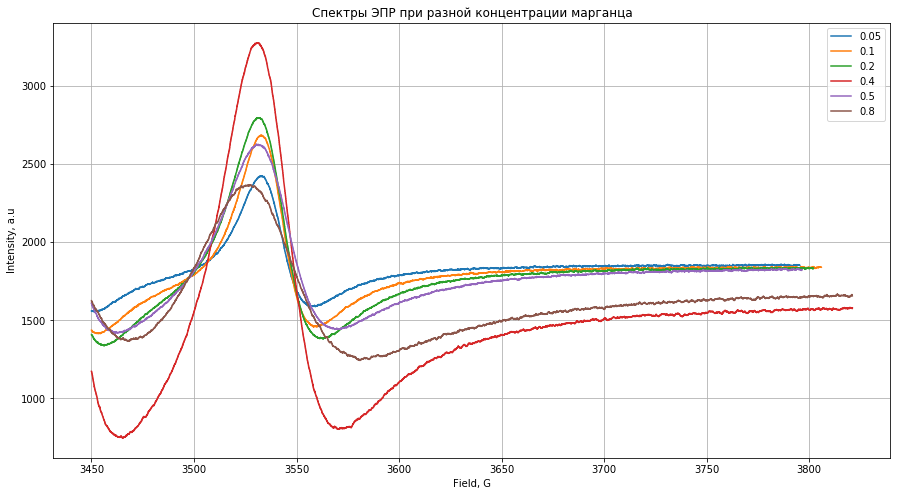

In [12]:
plt.figure(figsize=(15, 8)) # можно указать явно ширину и высоту графика (строчка не обязательна)\n",
plt.plot(x001,y001, label='0.05')
plt.plot(x002,y002,label='0.1')
plt.plot(x003,y003, label='0.2')
plt.plot(x004,y004,  label='0.4')
plt.plot(x005,y005,  label='0.5')
plt.plot(x006,y006, label='0.8')
plt.legend() # показывать легенду,
plt.grid() # включить отрисовку сетки c определенными параметрами\n",
plt.yticks() # можно явно указать, как подписывать ось\n",
plt.xticks()
plt.xlabel('Field, G')
plt.ylabel('Intensity, a.u')
plt.title('Спектры ЭПР при разной концентрации марганца')

In [32]:
def halfwidth2(x, y):
    maks = max(y)
    default = np.mean(y[-40:-1])
    halfheight = (maks - default)/1.4
    halfheight = halfheight+default
    for i in range(len(y)):
        if(y[i] == maks):
            xmax = x[i]
            indmax = i
    dist = maks
    for i in range(indmax):
        if(abs(halfheight - y[i]) < dist):
            x1 = x[i]
            dist = abs(halfheight - y[i])
    dist = maks
    for i in range(indmax, len(x)):
        if(abs(halfheight - y[i]) < dist):
            x2 = x[i]
            dist = abs(halfheight - y[i])
    return (x2-x1)/2

In [35]:
hfw = []
konts = [0.05, 0.1, 0.2, 0.4, 0.5, 0.8]
hfw.append(halfwidth2(x001, y001))
hfw.append(halfwidth2(x002, y002))
hfw.append(halfwidth2(x003, y003))
hfw.append(halfwidth2(x004, y004))
hfw.append(halfwidth2(x005, y005))
hfw.append(halfwidth2(x006, y006))

In [40]:
poly = np.polyfit(konts, hfw, 1)
p2 = np.poly1d(poly)
line = np.linspace(0, 0.8, 100)
poly

array([8.12901554, 6.48341969])

Text(0.5, 1.0, 'Зависимость полуширины пиков от концентрации')

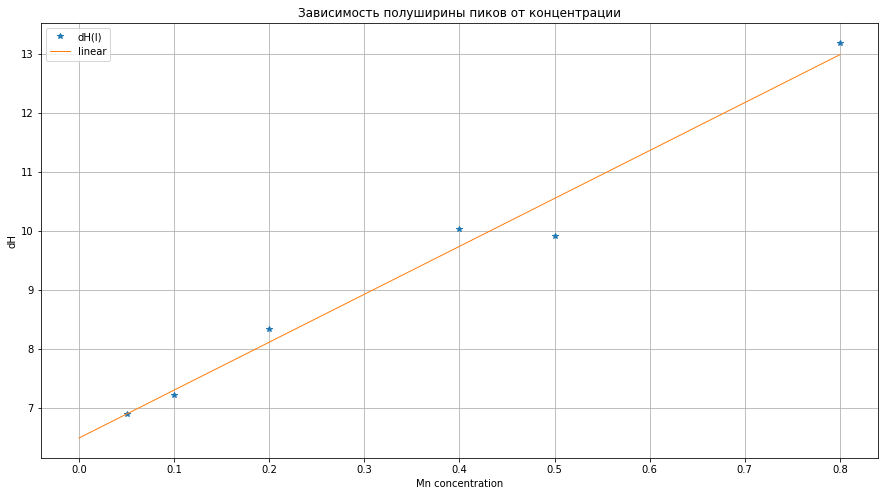

In [39]:
plt.figure(figsize=(15, 8)) # можно указать явно ширину и высоту графика (строчка не обязательна)\n",
plt.plot(konts,hfw, label='dH(I)', linewidth=0, marker = "*")
plt.plot(line,p2(line), label='linear', linewidth=1)
plt.legend() # показывать легенду,
plt.grid() # включить отрисовку сетки c определенными параметрами\n",
plt.yticks() # можно явно указать, как подписывать ось\n",
plt.xticks()
plt.xlabel('Mn concentration')
plt.ylabel('dH')
plt.title('Зависимость полуширины пиков от концентрации')